# U.S. Medical Insurance Costs

This project's purpose is to analyze data about medical insurance costs from a CSV file using Python fundamentals. Given insurance.csv, some attributes were studied to find potential features of the patients information in the file and reported as results.

### Importing data from a csv file
Looking into **insurance.csv** file, it involves 7 columns as following:
* age
* sex 
* bmi
* children
* smoker
* region
* charges

<br>Thus, import csv and create empty lists for each attribute.

In [1]:
# import csv module
import csv
# create attributes lists
ages = []
sexes = []
bmis = []
num_of_children = []
smoker_statuses = []
regions = []
charges = []

### Create a function to open a csv file and iterate through rows to assign values to variables

In [2]:
# function to help download a certain column data to an assigned list
def load_data(lst_name, file_name, column):
    with open(file_name) as csv_file:
        csv_data = csv.DictReader(csv_file)
        for row in csv_data:
            lst_name.append(row[column])
    return lst_name
      

In [3]:
#download all data in each column
load_data(ages, 'insurance.csv', 'age')
load_data(sexes, 'insurance.csv', 'sex')
load_data(bmis, 'insurance.csv', 'bmi')
load_data(num_of_children, 'insurance.csv', 'children')
load_data(smoker_statuses, 'insurance.csv', 'smoker')
load_data(regions, 'insurance.csv', 'region')
load_data(charges,'insurance.csv', 'charges')

After storing data from insurance.csv file into data lists, I set the aspects of data that I was interested in. The following is a list of questions that I chose to investigate.
  * Total number of patients
  * Average age, Maximum age, and Minimum age of patients
  * Proportion of male and female patients
  * Population of patients categorized by age groups and sex
  * The relationship between age groups and charges
  * Proportion of patients who has no child and patients who has at least a child
  * The relationship between number of children and charges


<br>For more convenience, I imported decimal module to make it easier to show results in 2 decimal places.

In [4]:
from decimal import Decimal

## Total number of patients

In [23]:
#find total number of patients by finding length of dataset
#set a variable called grand_total_patients 
grand_total_patients = len(ages)
print("Total number of patients is " + str(grand_total_patients) + " people.")

Total number of patients is 1338 people.


## Find average, maximum, and minimum age of patients 

In [5]:
#create a function to calculate average age by taking an ages list as a parameter
def analyze_age(ages_list):
    #set total_age equals to 0
    total_age = 0
    #iterate through each age value in the list and add up the value to total_age
    for age in ages_list:
        total_age += int(age)
    return "Average age: " + str(round(Decimal(total_age/len(ages_list)),2)) + "\n" +"Maximum age: " + str(max(ages_list)) + "\n" + "Minimum age: " + str(min(ages_list)) 


#run the function cal_avg_age 
print(analyze_age(ages))

Average age: 39.21
Maximum age: 64
Minimum age: 18


## Find the proportion of female and male patients

In [6]:
#create a function to analyze proportion of female and male patients by taking a sexes list as a parameter)
def cal_sex_proportion(sexes_list):
    #create counter variables and set them to 0
    count_female = 0
    count_male = 0
    #find the number of patients in the list
    number_of_patients = len(sexes_list)
    #iterate through the list to count the number of female and male patients
    for sex in sexes_list:
        if sex == 'female':
            count_female += 1
        else:
            count_male += 1
    #calculate percentage of each sex compared to all patients
    female_percent = Decimal(count_female / number_of_patients * 100)
    male_percent = Decimal(count_male / number_of_patients * 100)
    return str(round(female_percent,2)) + "% of patients are female. (" + str(count_female) + " people)" + "\n" + str(round(male_percent,2)) + "% of patients are male. (" + str(count_male) + " people)"

#run the function cal_sex_proportion
print(cal_sex_proportion(sexes))

49.48% of patients are female. (662 people)
50.52% of patients are male. (676 people)


## Population of patients categorized by age groups and sex
First of all, patients' ages are categorized by age ranges as follows. 
 * +70 years old
 * 60-69 years old
 * 50-59 years old
 * 40-49 years old
 * 30-39 years old
 * 20-29 years old
 * 10-19 years old
 * 0-9 years old 

<br>To make data more interesting, the result will be illustrated by a population pyramid bar chart. Therefore, the dataset needed to be prepared again, using pandas and seaborn. A new dataframe includes 3 columns : *'Age_Group', 'Male', and 'Female'* which <font color = 'red'>'Male' column has </font> <font color = 'blue'>**minus** </font><font color = red> values in order to plot bars in opposite of 'Female' bars on an x-axis.</font>

In [8]:
#import pandas and seaborn libraries
import pandas as pd
import seaborn as sns

In [9]:
#create a function to create a new dataframe by taking a csv file as a parameter
def label_age_group(csv_file):
    #create a dataframe to store age and sex values for plotting
    new_df = pd.DataFrame({'Age_Group' : ['70+', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9'],
                 'Male' : [0, 0, 0, 0, 0, 0, 0, 0],
                 'Female' : [0, 0, 0, 0, 0, 0, 0, 0]})
    #read csv file with pandas
    pd_df = pd.read_csv(csv_file)
    #count the number of patients seperated by age groups and sex
    #to count 'Male' - using  '-='
    #to count 'Female' - using '+='
    for i, row in pd_df.iterrows():
        if pd_df.loc[i, "age"] >= 70:
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "70+", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "70+", 'Female'] += 1
        elif pd_df.loc[i, "age"] >= 60 and pd_df.loc[i, "age"] <= 69 :
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "60-69", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "60-69", 'Female'] += 1
        elif pd_df.loc[i, "age"] >= 50 and pd_df.loc[i, "age"] <= 59 :
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "50-59", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "50-59", 'Female'] += 1
        elif pd_df.loc[i, "age"] >= 40 and pd_df.loc[i, "age"] <= 49 :
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "40-49", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "40-49", 'Female'] += 1
        elif pd_df.loc[i, "age"] >= 30 and pd_df.loc[i, "age"] <= 39 :
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "30-39", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "30-39", 'Female'] += 1
        elif pd_df.loc[i, "age"] >= 20 and pd_df.loc[i, "age"] <= 29 :
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "20-29", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "20-29", 'Female'] += 1
        elif pd_df.loc[i, "age"] >= 10 and pd_df.loc[i, "age"] <= 19 :
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "10-19", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "10-19", 'Female'] += 1
        else:
            if pd_df.loc[i, "sex"] == 'male':
                new_df.loc[new_df.Age_Group == "0-9", 'Male'] -= 1
            else:
                new_df.loc[new_df.Age_Group == "0-9", 'Female'] += 1
    return new_df

In [10]:
#create a new variable called cat_by_age_sex which stores a new dataframe
cat_by_age_sex = label_age_group("insurance.csv")
cat_by_age_sex

,Age_Group,Male,Female
0,70+,0,0
1,60-69,-56,58
2,50-59,-134,137
3,40-49,-140,139
4,30-39,-130,127
5,20-29,-145,135
6,10-19,-71,66
7,0-9,0,0


In [11]:
#create the function that plots the population pyramid graph by taking a new dataframe as a parameter
def patients_by_age_group_sex_chart(dataframe):
    age_class = ['70+', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']
    bar_plot = sns.barplot(x = 'Male', y = 'Age_Group', data = dataframe, order = age_class, palette='Blues', lw= 0)
    bar_plot = sns.barplot(x = 'Female', y = 'Age_Group', data = dataframe, order = age_class, palette='RdPu', lw = 0)
    bar_plot.set(xlabel = "The Number of Patients (people)", ylabel = "Age Group", title = "Patients Categorized by Age Group and Sex")


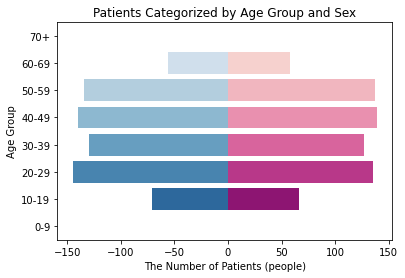

In [12]:
#plot the population of patients categorized by age groups and sex
patients_by_age_group_sex_chart(cat_by_age_sex)

## The Relationship Between Age Groups and Charges 
After grouping patients by age, the average charges for each age group were calculated to detemine how charges are related to age groups.
 
<br>Remarks: Even if there is no 0-9 year old patients and +70 year old patients, the age groups still involve both age ranges in case there is more data collected.

In [13]:
#create a function to calculate average charges for each age groups
def avg_charges_by_age(ages, charges, age_group_df):
    #set total charge for each age group equal to 0
    total_charges_70up = 0
    total_charges_6069 = 0
    total_charges_5059 = 0
    total_charges_4049 = 0
    total_charges_3039 = 0
    total_charges_2029 = 0
    total_charges_1019 = 0
    total_charges_0009 = 0
    #from the dataframe of patients categorized by age and sex, calculate the total number of patients for each age group
    #by adding the column 'Total_patients' = - num of 'Male' patients + num of 'Female' patients
    age_group_df.loc[age_group_df.Age_Group == "70+", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "70+", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "70+", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "60-69", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "60-69", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "60-69", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "50-59", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "50-59", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "50-59", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "40-49", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "40-49", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "40-49", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "30-39", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "30-39", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "30-39", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "20-29", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "20-29", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "20-29", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "10-19", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "10-19", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "10-19", 'Female']
    age_group_df.loc[age_group_df.Age_Group == "0-9", 'Total_patients']  = - age_group_df.loc[age_group_df.Age_Group == "0-9", 'Male'] + age_group_df.loc[age_group_df.Age_Group == "0-9", 'Female']
    #set index = 0 
    i = 0
    #iterate throught ages and charges lists
    #sum up the charges for each age group
    for i in range(len(ages)):
        if int(ages[i]) > 70:
            total_charges_70up += float(charges[i])
            i = i+1
        elif int(ages[i]) >= 60 and int(ages[i]) <= 69:
            total_charges_6069 += float(charges[i])
            i = i +1
        elif int(ages[i]) >= 50 and int(ages[i]) <= 59:
            total_charges_5059 += float(charges[i])
            i = i+1
        elif int(ages[i]) >= 40 and int(ages[i]) <= 49:
            total_charges_4049 += float(charges[i])
            i = i+1
        elif int(ages[i]) >= 30 and int(ages[i]) <= 39:
            total_charges_3039 += float(charges[i])
            i = i+1
        elif int(ages[i]) >= 20 and int(ages[i]) <= 29:
            total_charges_2029 += float(charges[i])
            i = i+1
        elif int(ages[i]) >= 10 and int(ages[i]) <= 19:
            total_charges_1019 += float(charges[i])
            i = i+1
        else:
            total_charges_0009 += float(charges[i])
            i = i+1
    #calculate average charges for each age group by dividing total charges with total number of patients
    #then store the value in the new column 'Average_charges'
    age_group_df.loc[age_group_df.Age_Group == "70+", "Average_charges"] = total_charges_70up / age_group_df.loc[age_group_df.Age_Group == "70+", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "60-69", "Average_charges"] = total_charges_6069 / age_group_df.loc[age_group_df.Age_Group == "60-69", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "50-59", "Average_charges"] = total_charges_5059 / age_group_df.loc[age_group_df.Age_Group == "50-59", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "40-49", "Average_charges"] = total_charges_4049 / age_group_df.loc[age_group_df.Age_Group == "40-49", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "30-39", "Average_charges"] = total_charges_3039 / age_group_df.loc[age_group_df.Age_Group == "30-39", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "20-29", "Average_charges"] = total_charges_2029 / age_group_df.loc[age_group_df.Age_Group == "20-29", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "10-19", "Average_charges"] = total_charges_1019 / age_group_df.loc[age_group_df.Age_Group == "10-19", 'Total_patients']
    age_group_df.loc[age_group_df.Age_Group == "0-9", "Average_charges"] = total_charges_0009 / age_group_df.loc[age_group_df.Age_Group == "0-9", 'Total_patients']
    
    return age_group_df

In [14]:
avg_charges_by_age(ages, charges, cat_by_age_sex)

,Age_Group,Male,Female,Total_patients,Average_charges
0,70+,0,0,0.0,NaN
1,60-69,-56,58,114.0,21248.021885
2,50-59,-134,137,271.0,16495.232665
3,40-49,-140,139,279.0,14399.203564
4,30-39,-130,127,257.0,11738.784117
5,20-29,-145,135,280.0,9561.751018
6,10-19,-71,66,137.0,8407.349242
7,0-9,0,0,0.0,NaN


## Find the proportion of patients who 'has no child' VS 'has at least a child'

In [7]:
def no_child_proportion(children_list):
    #create counter variables and set them to 0
    count_no_child = 0
    count_has_child = 0
    #find the number of patients in the list
    number_of_patients = len(children_list)
    #iterate through the list to count the number of patients who has no child and has at least a child.
    for children in children_list:
        if int(children) == 0:
            count_no_child += 1
        else:
            count_has_child += 1
    #calculate percentage of each category to all patients
    no_child_percent = Decimal(count_no_child / number_of_patients * 100)
    has_child_percent = Decimal(count_has_child / number_of_patients * 100)
    return str(round(no_child_percent,2)) + "% of patients has no child. (" + str(count_no_child) + " people)" + "\n" + str(round(has_child_percent,2)) + "% of patients has at least a child. (" + str(count_has_child) + " people)"

#run the function no_child_proportion
print(no_child_proportion(num_of_children))

42.90% of patients has no child. (574 people)
57.10% of patients has at least a child. (764 people)


## The Relationship Between Number of Children and Charges 
In order to investigate more about relationship between number of children and charges, the features of num_of_children was explored to find out what is the maximum number of children that patients have and how many patients there are for the certain number of children.

In [15]:
#find the maximum  number of children
print(max(num_of_children))

5


In [24]:
#find the number of  patients grouped by the certain number of children they have
#set total number for each group equal to 0
total_children_0 = 0
total_children_1 = 0
total_children_2 = 0
total_children_3 = 0
total_children_more_than_3 = 0
for num in num_of_children:
    if int(num) == 0:
        total_children_0 += 1
    elif  int(num) == 1:
        total_children_1 +=1
    elif  int(num) == 2:
        total_children_2 += 1
    elif  int(num) == 3:
        total_children_3 += 1
    else:
        total_children_more_than_3 +=1
print("No child: " , str(total_children_0))
print("One child: ", str(total_children_1))
print("Two children: ", str(total_children_2))
print("Three children: ", str(total_children_3))
print("More than three Children: ", str(total_children_more_than_3))

No child:  574
One child:  324
Two children:  240
Three children:  157
More than three Children:  43


In [17]:
#create a function that takes num_of_children and charges lists as parameters
def avg_chg_by_children(children_list, charges_list):
    #create a dictionary which has num_of_children as keys and the values are sub-dictionaries which store
    #num_of_patients, total_charges, and avg_charges for each num_of_children
    pat_by_children = {'0' : {"num_of_patients" : 0, "total_charges" : 0, "avg_charges" : 0},
                                '1' : {"num_of_patients" : 0, "total_charges" : 0, "avg_charges" : 0},
                                '2' : {"num_of_patients" : 0, "total_charges" : 0, "avg_charges" : 0},
                                '3' : {"num_of_patients" : 0, "total_charges" : 0, "avg_charges" : 0},
                                '>3' : {"num_of_patients" : 0, "total_charges" : 0, "avg_charges" : 0}}
    i = 0
    #iterate through children_list and charges_list
    for i in range(len(children_list)):
        #check the children_list's value then count num_of_patients and add charges'_list's value to "total_charges" according to num_of_children
        if children_list[i] == '0':
            pat_by_children['0']["num_of_patients"] += 1
            pat_by_children['0']["total_charges"] += float(charges_list[i])
            i = i + 1
        elif children_list[i] == '1':
            pat_by_children['1']["num_of_patients"] += 1
            pat_by_children['1']["total_charges"] += float(charges_list[i])
            i = i + 1
        elif children_list[i] == '2':
            pat_by_children['2']["num_of_patients"] += 1
            pat_by_children['2']["total_charges"] += float(charges_list[i])
            i = i + 1
        elif children_list[i] == '3':
            pat_by_children['3']["num_of_patients"] += 1
            pat_by_children['3']["total_charges"] += float(charges_list[i])
            i = i + 1
        else:
            pat_by_children['>3']["num_of_patients"] += 1
            pat_by_children['>3']["total_charges"] += float(charges_list[i])
            i = i + 1
    pat_by_children['0']["avg_charges"] = round((pat_by_children['0']["total_charges"] / pat_by_children['0']["num_of_patients"]),2)
    pat_by_children['1']["avg_charges"] = round((pat_by_children['1']["total_charges"] / pat_by_children['1']["num_of_patients"]),2)
    pat_by_children['2']["avg_charges"] = round((pat_by_children['2']["total_charges"] / pat_by_children['2']["num_of_patients"]),2)
    pat_by_children['3']["avg_charges"] = round((pat_by_children['3']["total_charges"] / pat_by_children['3']["num_of_patients"]),2)
    pat_by_children['>3']["avg_charges"] = round((pat_by_children['>3']["total_charges"] / pat_by_children['>3']["num_of_patients"]),2)
    return pat_by_children

In [18]:
#run the previous function to calculate total charges and average charges categorized by number of children then store in a variable
avg_charges_compared_by_children = avg_chg_by_children(num_of_children, charges)
avg_charges_compared_by_children

{'0': {'num_of_patients': 574,
  'total_charges': 7098069.995338997,
  'avg_charges': 12365.98},
 '1': {'num_of_patients': 324,
  'total_charges': 4124899.673449997,
  'avg_charges': 12731.17},
 '2': {'num_of_patients': 240,
  'total_charges': 3617655.296149999,
  'avg_charges': 15073.56},
 '3': {'num_of_patients': 157,
  'total_charges': 2410784.983589999,
  'avg_charges': 15355.32},
 '>3': {'num_of_patients': 43,
  'total_charges': 504415.04222999985,
  'avg_charges': 11730.58}}

In [19]:
def inform_chg_by_children(pat_by_children_dict):
    return print("Average charges for patients who have no child: " + str(pat_by_children_dict['0']['avg_charges']) + "\n" +
                 "Average charges for patients who have 1 child: " + str(pat_by_children_dict['1']['avg_charges']) + "\n" +
                 "Average charges for patients who have 2 children: " + str(pat_by_children_dict['2']['avg_charges']) + "\n" +
                 "Average charges for patients who have 3 children: " + str(pat_by_children_dict['3']['avg_charges']) + "\n"  +
                 "Average charges for patients who have more than 3 children: " + str(pat_by_children_dict['>3']['avg_charges']))

In [20]:
inform_chg_by_children(avg_charges_compared_by_children)

Average charges for patients who have no child: 12365.98
Average charges for patients who have 1 child: 12731.17
Average charges for patients who have 2 children: 15073.56
Average charges for patients who have 3 children: 15355.32
Average charges for patients who have more than 3 children: 11730.58


## To summarize, 
* Total number of patients was 1338 people
* Insight about patients' age
    * Average age was 39.21 years old
    * Maximum age was 64 years old
    * Minimum age was 18 years old
* Female and male patients had almost the same proportion (49.48% and 50.52% respectively)
* Population of patients categorized by age groups and sex
    * Majorities were the age group between 20-59 year old and each age group shared almost the same number of both female and male patients.
    * Minorities were the age group '10-19 year old' and '60-69 year old.
* The relationship between age groups and charges
    * The insurance charges got higher along with patients' age.
* Proportion of patients who had no child and patients who had at least a child
    * There was little difference in number between these two groups.
* The relationship between the number of children and charges
    * **Interestingly,** insurance charges did not largely differ between patients who have no child and one child. 
    * However, the cost got higher when patients have 2 children which was almost the same as ones who had 3 children.
    * Somehow, patients who had more than 3 children had **less charges** than other groups so that it is necessary to investigate more for the reason.
       